# Описательная статистика

In [2]:
# !pip install scipy

In [3]:
import numpy as np
import pandas as pd

from scipy import stats

import warnings 
warnings.filterwarnings("ignore") # для уменьшения количества выводимых ошибок

Основные статистики для описания данных:

 - средняя = `np.mean(sample)`
 - медиана = `np.median(sample)`
 - дисперсия = `np.var(sample)`
 - стандартное отклонение = `np.std(sample)`

**Выброс** — это значение в выборке, которое сильно отличается от других значений и не соответствует остальным данным. Он может быть вызван ошибкой измерения или каким-то фактором, который не представлен в других данных.

**Выборка** — это группа объектов или значений, которые были выбраны из общей группы (например, население страны или список продуктов в магазине). Она представляет собой подмножество данных, на основе которого проводится анализ.

Как генерируем данные?

Библиотекой numpy!

```python
np.random.normal(loc=5, scale=1, size=200)
```

Функция создает случайную (далее - рандомную) выборку с нормальным распределением.

Где:
- `loc` - "центр" нашей выборки (среднее значение, вокруг которого распределены данные)
- `scale` - стандратное отклонение нашей выборки
- `size` - размер нашей выборки (количество значений)

In [22]:
data = pd.Series(np.random.normal(5, 1, 2000))

data.head()

0    4.181781
1    6.172732
2    5.012720
3    6.181861
4    5.350292
dtype: float64

In [23]:
print(f'''Среднее: {data.mean()},
Медиана: {data.median()},
Дисперсия: {data.var()},
Стандартное отклонение: {data.std()}''')

Среднее: 5.001549774452079,
Медиана: 4.993936199015383,
Дисперсия: 0.9983083345700609,
Стандартное отклонение: 0.999153809265651


In [24]:
data.describe()

count    2000.000000
mean        5.001550
std         0.999154
min         1.780200
25%         4.317910
50%         4.993936
75%         5.668161
max         8.658139
dtype: float64

In [29]:
df = pd.DataFrame({
    'x': data,
    'y': pd.Series(np.concatenate([np.random.normal(10, 1, 1950), np.random.normal(20, 1, 50)]))
})

df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,2000.0,5.001550,0.999154,1.780200,4.317910,4.993936,5.668161,8.658139
y,2000.0,10.235316,1.819495,6.606472,9.383617,10.019629,10.694334,21.789037


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       2000 non-null   float64
 1   y       2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


**Гистограмма** - столбчатый график для визуализации данных, сгруппированных по частоте попадания в определённый интервал (частотное распределение). То есть как часто встречаются те или иные значения в интервале.

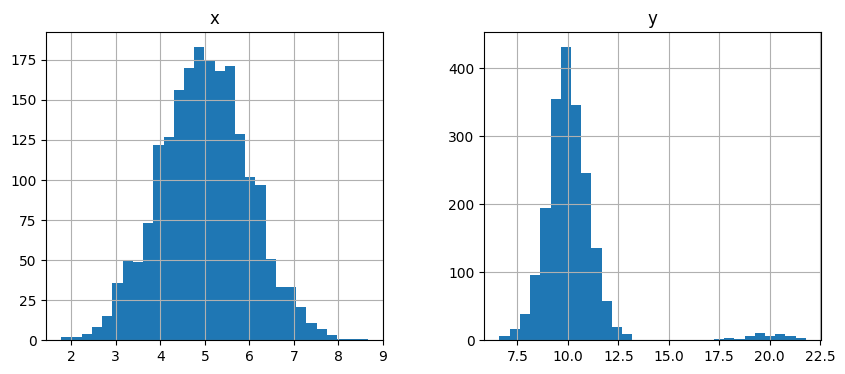

In [35]:
df.hist(figsize=(10,4), bins=30);

# Проверка гипотез с помощью python.

## **Проверка гипотез**

- Двусторонняя гипотеза
- Односторонняя гипотеза

### Двусторонняя гипотеза:
- **H0 — Нулевая гипотеза.**

*«Среднее время выполнения задачи на компьютере A не отличается от среднего времени выполнения на компьютере B».*

- **H1 — Альтернативная гипотеза.**

*«Среднее время выполнения задачи на компьютере A отличается от среднего времени выполнения на компьютере B».*

**Время выполнения задачи на компьютере А может быть как меньше, так и больше, чем на компьютере В**

### Односторонняя гипотеза

- **H0 — Нулевая гипотеза.**

*«Среднее время выполнения задачи на компьютере A равно среднему времени выполнения на компьютере B».*

- **H1 — Альтернативная гипотеза.**

*«Среднее время выполнения задачи на компьютере A меньше/больше от среднего времени выполнения на компьютере B».*

**Время выполнение задачи на компьютере может сместиться лишь в одну сторону.**

После того, как гипотезы были сформулированы, можно приступить к проверке этих гипотез.

## P-value

**P-value** - то вероятность получения таких же или более экстремальных результатов в эксперименте, при условии, что нулевая гипотеза (гипотеза о равенстве эффекта в обеих группах) верна. Иными словами, это вероятность получить наблюдаемый результат только случайно. Чем меньше `p-value`, тем больше оснований отклонить нулевую гипотезу и принять альтернативную, что различия между группами статистически значимы. Обычно, если `p-value` меньше `0,05` (или `5%`), то различия считаются статистически значимыми.

## Рассмотрим пример

Метод `scipy.stats.ttest_1samp()` возвращает два числа: статистику разности и p-value.

Метод спользуется для определения статистической значимости различий между средним значением выборки и известным или гипотетическим значением среднего в генеральной совокупности. Он выполняет тест t-критерия Стьюдента и возвращает t-статистику и двустороннее p-значение.

### Двусторонний тест

In [38]:
alpha = .05

_, pvalue = stats.ttest_1samp(df.x, popmean=6)

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

P-value:0.00000. Нулевая гипотеза отвергается


Это означает, что нет различий между средним значением выборки и `5`. Потому подтверждается нулевая гипотеза.

### Односторонний тест

А что, если нужно узнать, в какую именно сторону меняется?

In [ ]:
df.x.mean()

In [ ]:
alpha = .05
needed_value = 6

_, pvalue = stats.ttest_1samp(df.x, popmean=needed_value)

pvalue /= 2

# отвергаем гипотезу только тогда, когда выборочное среднее значимо меньше предполагаемого значения
if (pvalue < alpha) and (df.x.mean() < needed_value):
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

Алгоритм прост - нужно `pvalue` поделить на 2 и сравнить среднее с нужным значением!

## Равенство средних двух совокупностей

Метод `scipy.stats.ttest_ind()` используется для определения статистической значимости различий между средними значениями двух независимых выборок. Она выполняет двухсторонний тест t-критерия Стьюдента и возвращает t-статистику и двустороннее p-значение.

Аргументы функции:
 - первая выборки значений
 - вторая выборка значений
 - `equal_var` - опциональный параметр для указания равенства дисперсий между двумя выборками. По умолчанию, `equal_var=True`.

Перед тем, как проводить тест, нужно придерживаться трех правил:

1. **Независимость выборок** - данные в двух группах должны быть независимыми друг от друга. Если рассматриваются две выборки после определенного времени - лучше использовать другой тест.
2. **Дисперсии данных в каждой группе должны быть примерно равными.** В принципе, если значений больше 30 и выборки по размеру равны - можно пробовать.
3. **Распределение данных в каждой группе должно быть нормальным.** Но это условие тоже не препятствие - как говорилось в прошлом правиле, если значений много - они будут распределены вокруг истинного среднего (среднего ген. совокупности). Для корректного использования t-теста это необязательно.

`equal_var`? Указывайте **False** только в том случае, если размеры выборок не равны и вы сомневаетесь, что диспресии равные.

In [ ]:
a = df.y.sample(1000)
b = df.y.sample(1000)

alpha = .05

_, pvalue = stats.ttest_ind(a, b)

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

## Гипотеза о равенстве средних двух зависимых совокупностей

Метод `scipy.stats.ttest_rel()` - используется для проведения парного двухвыборочного t-теста на основе связанных выборок. Она вычисляет t-статистику и p-value для проверки гипотезы о равенстве средних значений двух связанных выборок. Эта команда принимает на вход два одномерных массива данных, представляющих собой две связанные выборки, и возвращает кортеж, состоящий из t-статистики и соответствующего ей p-value.

Таким методом обычно проверяют выборки после какого-либо времени или изменения.

In [ ]:
a = df.x.sample(1000)
b = df.x.sample(1000) * 1.01

alpha = .05

_, pvalue = stats.ttest_rel(a, b)

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

# Одномерный анализ

# Статистический анализ на норму


Анализы на норму используются для определения того, нормально ли распределен набор данных, и для проверки того, насколько вероятно, что случайная величина в наборе данных будет нормально распределена.

Популярные методы -  K'2-тест Д'Агостино, критерий Шапиро-Уилка, критерий Андерсона — Дарлинга.

Разница между этими тремя тестами заключается в способе вычисления статистики и критических значений, а также в основе предположений и гипотез о данных. Вообще говоря, все три теста предназначены для проверки нормальности данных, но могут давать разные результаты в зависимости от особенностей выборки.

Гипотезы:

* H0: выборка имеет распределение по Гауссу (нормальное распределение).
* H1: выборка не имеет распределения по Гауссу (не нормальное распределение).

Примечание: **Тест Шапиро-Уилка** не выполняется в том случае, если размер выборки > 5000 и для этого теста p-значение может быть неточным для N > 5000

In [ ]:
df.hist(figsize=(10,4), bins=30);

### Тест Шапиро-Уилка

In [ ]:
_, pvalue = stats.shapiro(df.y)

alpha = .05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

### К'2-тест Д'Агостино

In [ ]:
_, pvalue = stats.normaltest(df.y)

alpha = 0.05

if pvalue < alpha:
    print(f'P-value:{pvalue:.5f}. Нулевая гипотеза отвергается')
else:
    print(f'P-value:{pvalue:.5f}. Подтверждается нулевая гипотеза')

### Критерий Андерсона — Дарлинга

`Критические значения` в статистическом тесте представляют собой диапазон заранее определенных границ значимости, при которых H0 может быть отклонен, если вычисленная статистика меньше критического значения.

Особенностью теста Андерсона-Дарлинга является то, что он возвращает список критических значений, а не одно значение p. Это может послужить основой для более тщательной интерпретации результата.

В данном случае - **normal/exponential** (15%, 10%, 5%, 2.5%, 1%)

In [ ]:
result = stats.anderson(df.y)

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Уровень значимости {sl:.2f}% : критическое значение {cv:.3f}, данные выглядят нормально (не удается отклонить H0)')
    else:
        print(f'Уровень значимости {sl:.2f}% : критическое значение {cv:.3f}, данные не выглядят нормально (отклоняем H0)')

## Двумерный Анализ

В этом разделе мы проведем обширный статистический анализ с проверкой различных гипотез на основе парных типов данных: 

* числовые и числовые данные
* числовые и порядковые данные
* порядковые и порядковые данные
* категориальные и категориальные данные


**Основные гипотезы:**

* H0: эти два признака независимы
* H1: существует зависимость между признаками

## Числовые и числовые

### Коэффициент корреляции Пирсона



Коэффициент корреляции `Пирсона` измеряет линейную связь между двумя наборами данных. 

Корреляция `Пирсона` предполагает нормальность и линейность. Корреляция Пирсона также не может определить разницу между зависимыми и независимыми переменными. 
Для корреляции `Пирсона` обе переменные должны быть нормально распределены.

Этот коэффициент изменяется в пределах от `-1` до `+1`, причем `0` означает отсутствие корреляции. 
- Корреляции, равные `-1` или `+1`, означают точную линейную связь. 
- Положительные корреляции означают, что с увеличением `x` увеличивается и `y`. 
- Отрицательные корреляции означают, что с увеличением `x` уменьшается `y`.

Гипотезы:

* **H0: две выборки не имеют монотонной взаимосвязи**
* **H1: существует монотонная взаимосвязь между выборками**

In [ ]:
alpha = 0.05

correlation, pvalue = stats.pearsonr(df.x, df.y)

print(f'Корреляция между "x", "y" равна: {correlation}, p: {pvalue}')

if pvalue < alpha:
    print('Вероятно, имеют монотонную взаимосвязь (отклоняем H0)')
else:
    print('Вероятно, у них нет монотонной взаимосвязи (подтверждается H0)')

In [ ]:
j = df.x * 1.1

alpha = 0.05

correlation, pvalue = stats.pearsonr(df.x, j)

print(f'Корреляция между "x", "j" равна: {correlation}, p: {pvalue}')

if pvalue < alpha:
    print('Вероятно, имеют монотонную взаимосвязь (отклоняем H0)')
else:
    print('Вероятно, у них нет монотонной взаимосвязи (подтверждается H0)')

### Коэффициент ранговой корреляции Спирмена 

Она же `Spearman's rho` или `Spearman correlation coefficient`

Применяется к **непрерывным или порядковым** переменным. Этот коэффициент изменяется в пределах от -1 до +1

**В отличие от корреляции `Пирсона`**, корреляция `Спирмена` не предполагает, что оба набора данных **распределены нормально**

Гипотезы:

* **H0: две выборки не имеют монотонной взаимосвязи**
* **H1: существует монотонная взаимосвязь между выборками**

In [ ]:
alpha = 0.05

correlation, pvalue = stats.spearmanr(df.x, df.y)

print(f'Корреляция между "x", "y" равна: {correlation}, p: {pvalue}')

if pvalue < alpha:
    print('Вероятно, имеют монотонную взаимосвязь (отклоняем H0)')
else:
    print('Вероятно, у них нет монотонной взаимосвязи (подтверждается H0)')

In [ ]:
j = df.x * 1.1

alpha = 0.05

correlation, pvalue = stats.spearmanr(df.x, j)

print(f'Корреляция между "x", "j" равна: {correlation}, p: {pvalue}')

if pvalue < alpha:
    print('Вероятно, имеют монотонную взаимосвязь (отклоняем H0)')
else:
    print('Вероятно, у них нет монотонной взаимосвязи (подтверждается H0)')

## Числовые и порядковые

### Коэффициент корреляции Кендалла

Он же **Kendall's τ** или **Kendall's Tau** или T-тест

Тау Кендалла часто используется для корреляции непрерывных данных, если в данных есть выбросы

Τ-тест - это непараметрическая проверка гипотезы на статистическую зависимость, основанная на коэффициенте τ

Примеры порядковых переменных:
* уровень образования (бакалавры / магистры / профессора), уровень дохода (если сгруппирован в высокий / средний / низкий) и т.д

Опять numpy!

```python
a = [0, 1, 2]
np.random.choice(a, size)
```

`np.random.choice` - позволяет создать список из случайных значений, заданных во входящем списке.

- **a** - входящий список, из которого берутся значения
- **size** - нужная длина нового списка

In [ ]:
primer = [0, 1, 2]

df['z'] = np.random.choice(primer, size=len(df))

correlation, pvalue = stats.kendalltau(df.x, df.z)
print(f'Корреляция между "x", "z" равна: {correlation}, p: {pvalue}')

alpha = 0.05
if pvalue < alpha:
    print('Признаки коррелированы (отклоняем H0)')
else:
    print('Признаки некоррелированы (не удается отклонить H0)')

In [ ]:
df['z'] = df.x.apply(lambda x: 0 if x < 5 else 1)

correlation, pvalue = stats.kendalltau(df.x, df.z)
print(f'Корреляция между "x", "z" равна: {correlation}, p: {pvalue}')

alpha = 0.05
if pvalue < alpha:
    print('Признаки коррелированы (отклоняем H0)')
else:
    print('Признаки некоррелированы (не удается отклонить H0)')

## Категориальная & категориальная 

### Chi-квадрат

Обнаружим независимость между 2 категориальными переменными.

Эта функция вычисляет статистику `chi-квадрат` и `p-value` для проверки гипотезы о независимости наблюдаемых частот в наблюдаемой таблице случайностей 

Результат выполнения функции - Тестовая статистика в контексте распределения `Chi-квадрат`.

В терминах `p-значения` и выбранного уровня значимости (`альфа`):

* Если **p-значение `<=` альфа**: значимый результат, отклоняем нулевую гипотезу (H0), признаки зависимы.
* Если **p-значение `>` альфа**: результат незначимый, подтвреждаем нулевую гипотезу (H0), независимы.

```python
pd.crosstab(data.column_1, data.column_2)
```

Кросс-таблица создается для отображения количества значений в каждой категории одного признаки в зависимости от значений другого признака (в документации `pandas` - вычисляет простую перекрестную табуляцию двух (или более) факторов)

In [ ]:
df['w'] = np.random.choice(primer, size=len(df))

pd.crosstab(df.z, df.w)

In [ ]:
crosstab = pd.crosstab(df.z, df.w)

stat, pvalue, _, _ = stats.chi2_contingency(crosstab)

alpha = 0.05
print(f'Statistics={stat}, p-value: {pvalue}')
if pvalue <= alpha:
    print('Зависимый (отклонить H0)')
else:
    print('Независимый (не удается отклонить H0)')

In [ ]:
df['j'] = df.w.apply(lambda x: 1 if x == 0 else 0)

crosstab = pd.crosstab(df.w, df.j)

stat, pvalue, _, _ = stats.chi2_contingency(crosstab)

alpha = 0.05
print(f'Statistics={stat}, p-value: {pvalue}')
if pvalue <= alpha:
    print('Зависимый (отклонить H0)')
else:
    print('Независимый (не удается отклонить H0)')

## ШПАРГАЛКА:

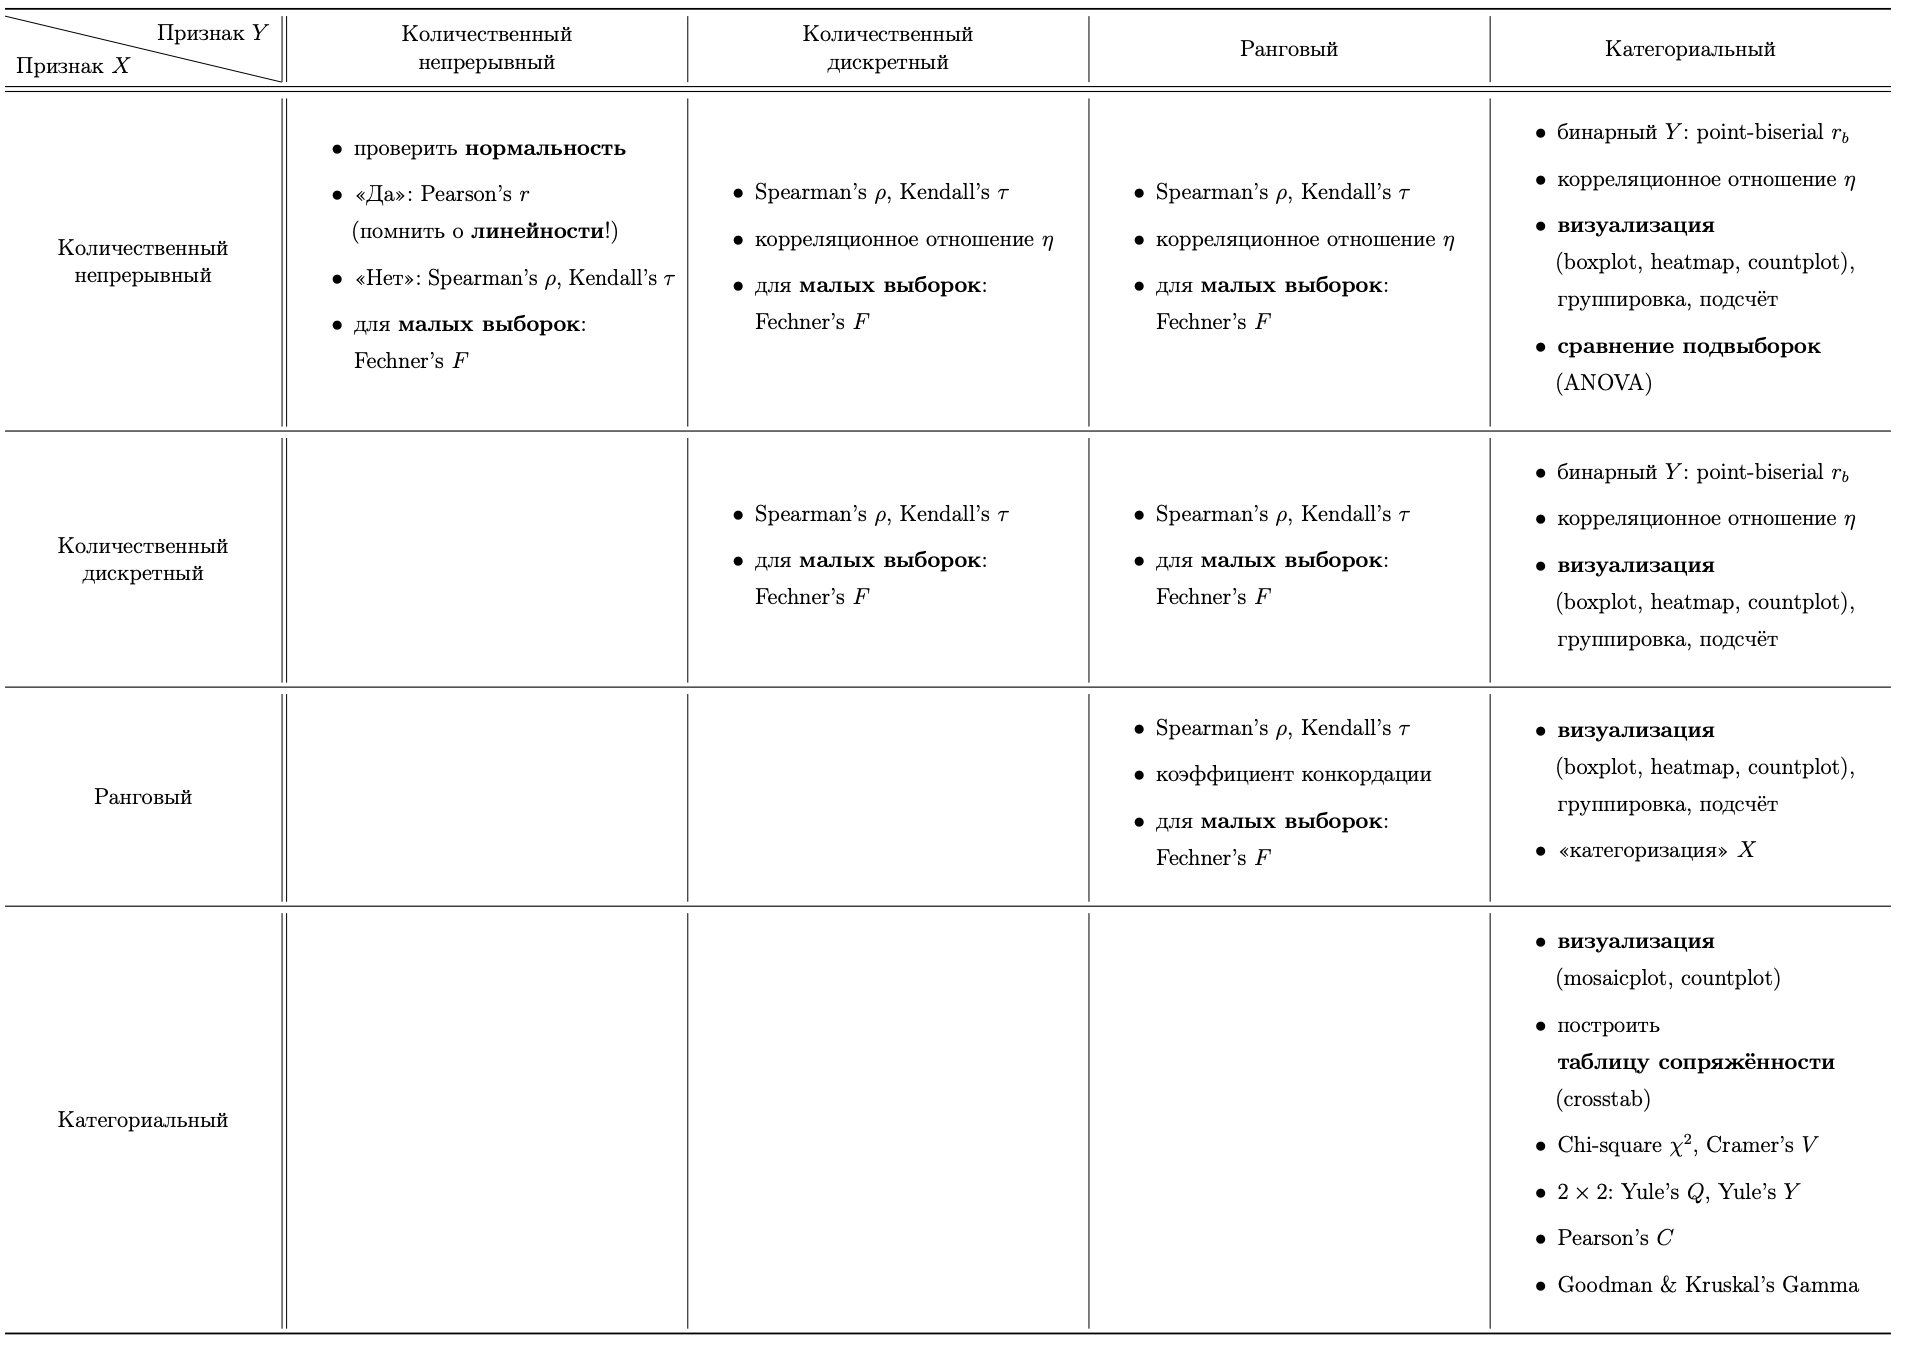

# Многомерный анализ

## Мультиколлинеарность

**Мультиколлинеарность** - это явление, когда два или более факторов в модели линейной регрессии сильно коррелируют между собой. Это может привести к значительному снижению точности и надежности результатов модели машинного обучения и может помешать определению вклада каждой переменной в модель. 

Встроенные в `pandas` методы:

 - `pearson` : Пирсона - стандартная.
 - `kendall` : Кендалл Тау
 - `spearman` : Ранговая Спирмена

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns # библиотека для визуализации данных

corrs = df.corr()
sns.heatmap(corrs,
            cmap='Greens',
            square=True,
            vmin=0, 
            annot=True);

На практике обычно удаляются те, которые превышают значения `> 0.8`. **НО** не корреляции с таргетом. Если у признака есть корреляция с таргетом - значит этот признак будет увеличивать метрики модели.

### Phik - корреляция

`Phik` корреляция - это новый тип коэффициента корреляции, который основан на статистической информации о распределении переменных и измеряет не только линейную, но и нелинейную связь между переменными. Этот коэффициент был представлен в 2018 году в статье "Phik: a new correlation coefficient between nominal variables" и может быть очень полезен в анализе данных с категориальными переменными.

`Phik` корреляция является непараметрическим коэффициентом корреляции, что значит, что он не требует предположений о распределении данных. Он включает в себя информацию о распределении категориальных переменных и позволяет обнаруживать различные зависимости между переменными, которые могут быть упущены при использовании обычного коэффициента корреляции.

Суть метода базируется на подсчете хи-квадрат статистики, затем ее трансформации в нечто подобное коэффициенту корреляции только на отрезке от 0 (нулевая взаимосвязь) до 1 (максимальная взаимосвязь)

In [ ]:
!pip install phik
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt # библиотека для визуализации данных

import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(5, 5))
plt.tight_layout()